# Level 1: Task 1 - Data Exploration and Preprocessing

In [1]:
import sys
!{sys.executable} -m pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\projects\restaurant\level1\task1\Dataset.csv')

#Display first five rows in the dataset

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Identify number of rows and columns

print(f"Number of rows in the dataset: {df.shape[0]}")
print(f"Number of columns in the dataset: {df.shape[1]}")

Number of rows in the dataset: 9551
Number of columns in the dataset: 21


In [5]:
#Shows all the columns

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
#Get basic info about data types and non-null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
#Missing values per column

missing_values = df.isnull().sum()
missing_percent = (missing_values/df.shape[0]) * 100

#Filter the columns which has missing values

missing_values = missing_values[missing_values>1]
missing_percent = missing_percent[missing_values.index]

print(f'Missing values: {missing_values}')
print(f'Missing Percentage: {missing_percent}')

Missing values: Cuisines    9
dtype: int64
Missing Percentage: Cuisines    0.094231
dtype: float64


In [8]:
#Filling the missing values using the string 'Unknown'

df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [9]:
#Check Imbalance of rating distribution

df['Aggregate rating'].value_counts().sort_index()

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

In [10]:
#Check Imbalance of rating distribution using percentage of each rating class

rating_distribution = df['Aggregate rating'].value_counts(normalize=True)*100
rating_distribution.sort_index()

Aggregate rating
0.0    22.489792
1.8     0.010470
1.9     0.020940
2.0     0.073291
2.1     0.157052
2.2     0.282693
2.3     0.492095
2.4     0.910899
2.5     1.151712
2.6     1.999791
2.7     2.617527
2.8     3.298084
2.9     3.989111
3.0     4.900010
3.1     5.433986
3.2     5.465396
3.3     5.057062
3.4     5.214114
3.5     5.025652
3.6     4.795309
3.7     4.470736
3.8     4.188043
3.9     3.507486
4.0     2.785049
4.1     2.868810
4.2     2.313894
4.3     1.821799
4.4     1.507696
4.5     0.994660
4.6     0.816668
4.7     0.439745
4.8     0.261753
4.9     0.638677
Name: proportion, dtype: float64

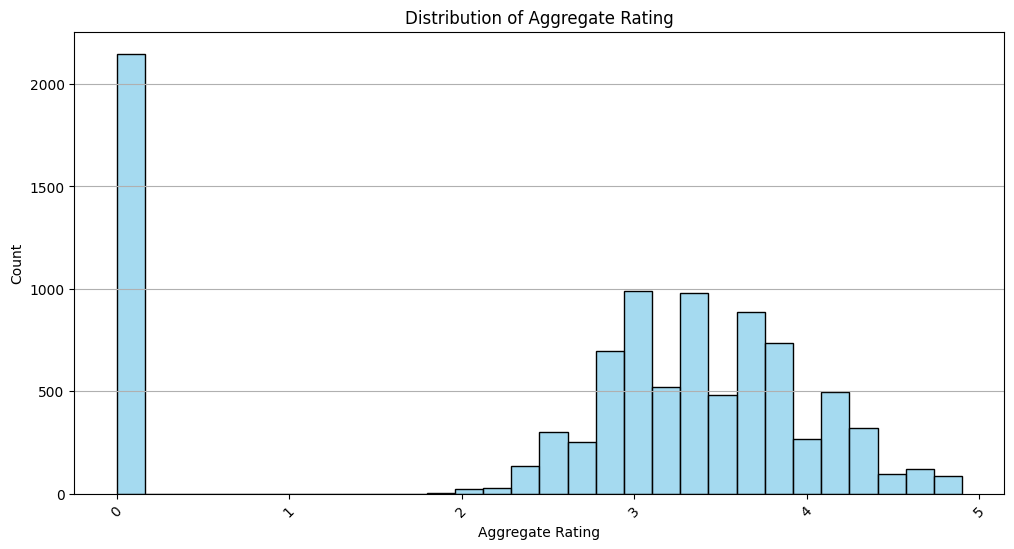

In [11]:
#Plotting the distribution of Aggregate Rating (Target Variable)

plt.figure(figsize=(12,6))

sns.histplot(df['Aggregate rating'], bins=30, kde=False, color='skyblue', edgecolor='black')

plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Aggregate Rating Distribution Analysis

- Over **22%** of restaurants have no rating (`0.0`)
- Ratings between `2.6 – 4.5` make up the majority (~60%+), suggesting most restaurants have fair to good feedback.
- High-end ratings (`4.6 – 4.9`) are **less than 2%**, indicating excellent-rated places are rare.
- For simplicity in modeling and visualization, we grouped the ratings as:
  - **Not Rated** (0.0)
  - **Low** (1.8 – 2.5)
  - **Medium** (2.6 – 3.5)
  - **High** (3.6 – 4.5)
  - **Excellent** (4.6 – 4.9)

In [12]:
#Function for group ratings into categories

def group_ratings(ratings):
    if ratings == 0.0:
        return 'Not Rated'
    elif ratings <=2.5:
        return 'Low'
    elif ratings <=3.5:
        return 'Medium'
    elif ratings <=4.5:
        return 'High'
    else:
        return 'Excellent'

In [13]:
#Group ratings into categories

df['Rating Category'] = df['Aggregate rating'].apply(group_ratings)

df['Rating Category'].value_counts().sort_index()

Rating Category
Excellent     206
High         2794
Low           296
Medium       4107
Not Rated    2148
Name: count, dtype: int64

In [14]:
#Save the cleaned data

df.to_csv('cleaned_data_after_task1.csv', index=False)